Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9006 - loss: 0.3249 - val_accuracy: 0.9821 - val_loss: 0.0544
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9847 - loss: 0.0507 - val_accuracy: 0.9888 - val_loss: 0.0346
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9893 - loss: 0.0338 - val_accuracy: 0.9901 - val_loss: 0.0288
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9929 - loss: 0.0227 - val_accuracy: 0.9905 - val_loss: 0.0296
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9948 - loss: 0.0163 - val_accuracy: 0.9908 - val_loss: 0.0277
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9869 - loss: 0.0377
Test doğruluğu: 0.9908000230789185


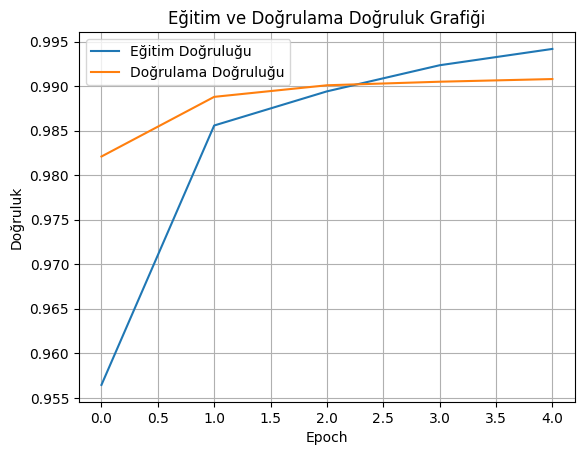

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


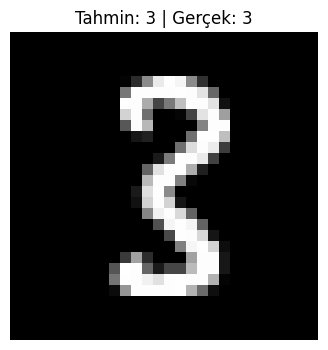

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# MNIST verisini yükle
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Veriyi normalize et ve boyutunu genişlet (CNN için)
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# CNN modeli oluştur
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Eğitimi başlat
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Başarı oranını test et
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test doğruluğu:", test_acc)

# Eğitim sürecini çizdir
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)
plt.title('Eğitim ve Doğrulama Doğruluk Grafiği')
plt.show()

import numpy as np

# Test setinden rastgele bir görüntü seç
index = np.random.randint(0, len(x_test))
sample_image = x_test[index]
true_label = y_test[index]

# Görüntüyü modelle tahmin et
prediction = model.predict(sample_image.reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)

# Görüntüyü çizdir ve tahmini göster
plt.figure(figsize=(4,4))
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Tahmin: {predicted_label} | Gerçek: {true_label}")
plt.axis('off')
plt.show()



In [3]:
import numpy as np

def max_pooling(matrix, size=2, stride=2):
    h, w = matrix.shape
    out_h = (h - size) // stride + 1
    out_w = (w - size) // stride + 1
    pooled = np.zeros((out_h, out_w))

    for i in range(0, h - size + 1, stride):
        for j in range(0, w - size + 1, stride):
            window = matrix[i:i+size, j:j+size]
            pooled[i//stride, j//stride] = np.max(window)
    
    return pooled

# Örnek matris
X = np.array([
    [1, 3, 2, 4],
    [5, 6, 7, 8],
    [4, 2, 9, 0],
    [3, 1, 5, 6]
])

print("Orijinal Matris:")
print(X)

Y = max_pooling(X, size=2, stride=2)

print("\nMax Pooling Çıktısı:")
print(Y)


Orijinal Matris:
[[1 3 2 4]
 [5 6 7 8]
 [4 2 9 0]
 [3 1 5 6]]

Max Pooling Çıktısı:
[[6. 8.]
 [4. 9.]]


In [4]:
import numpy as np

def fully_connected(x, weights, bias, activation='relu'):
    z = np.dot(weights, x) + bias
    if activation == 'relu':
        return np.maximum(0, z)
    elif activation == 'sigmoid':
        return 1 / (1 + np.exp(-z))
    elif activation == 'softmax':
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps)
    else:
        return z

# Girdi (3 özellik)
x = np.array([0.2, 0.5, 0.1])

# Ağırlıklar (2 nöronlu FC katmanı)
weights = np.array([
    [0.3, -0.7, 0.5],
    [0.6, 0.2, -0.1]
])

bias = np.array([0.2, -0.3])

# FC çıktı
output = fully_connected(x, weights, bias, activation='relu')
print("FC Çıkışı:", output)

FC Çıkışı: [0. 0.]


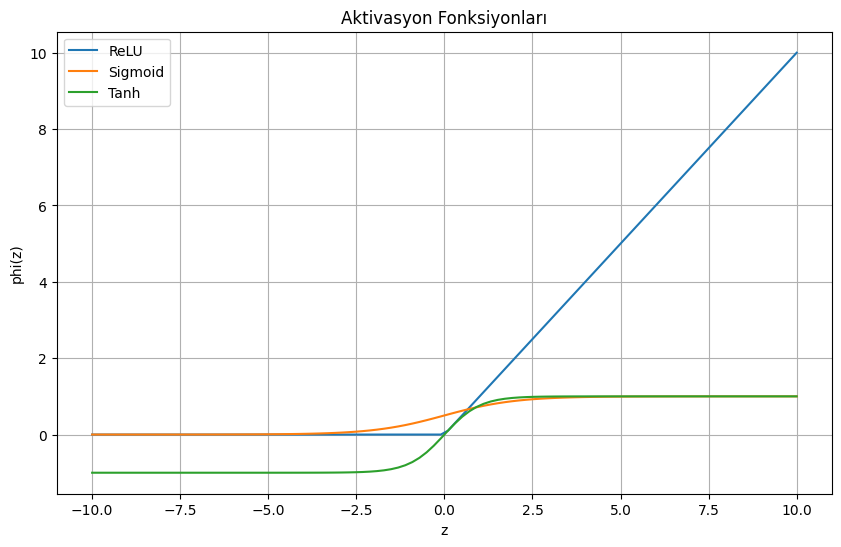

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Z değerleri
z = np.linspace(-10, 10, 100)

# Aktivasyonlar
relu = np.maximum(0, z)
sigmoid = 1 / (1 + np.exp(-z))
tanh = np.tanh(z)
softmax = np.exp(z) / np.sum(np.exp(z))  # tüm vektör için

# Çizim
plt.figure(figsize=(10,6))

plt.plot(z, relu, label="ReLU")
plt.plot(z, sigmoid, label="Sigmoid")
plt.plot(z, tanh, label="Tanh")
plt.title("Aktivasyon Fonksiyonları")
plt.xlabel("z")
plt.ylabel("phi(z)")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def softmax(z):
    exp_z = np.exp(z - np.max(z))  # stabilite için
    return exp_z / np.sum(exp_z)

# Örnek giriş
z = np.array([1.0, -1.0, 0.5])

print("ReLU:", relu(z))
print("Sigmoid:", sigmoid(z))
print("Tanh:", tanh(z))
print("Softmax:", softmax(z))


ReLU: [1.  0.  0.5]
Sigmoid: [0.73105858 0.26894142 0.62245933]
Tanh: [ 0.76159416 -0.76159416  0.46211716]
Softmax: [0.57409699 0.07769558 0.34820743]


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8967 - loss: 0.3244 - val_accuracy: 0.9871 - val_loss: 0.0412
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9862 - loss: 0.0459 - val_accuracy: 0.9877 - val_loss: 0.0381
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9903 - loss: 0.0309 - val_accuracy: 0.9903 - val_loss: 0.0312
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9929 - loss: 0.0224 - val_accuracy: 0.9894 - val_loss: 0.0339
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9948 - loss: 0.0151 - val_accuracy: 0.9883 - val_loss: 0.0389
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.0490
Test Doğruluğu: 0.9883000254631042
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


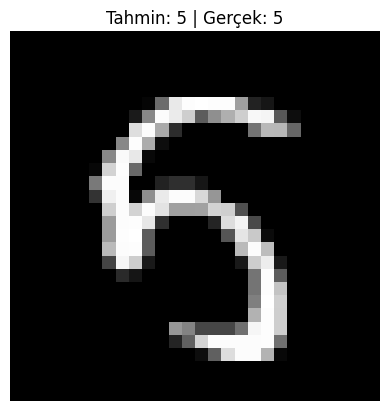

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. MNIST verisini yükle
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Normalizasyon ve yeniden boyutlandırma
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 3. CNN modelini kur
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),                        # Çok boyutluyu düzleştir
    layers.Dense(64, activation='relu'),     # Fully connected (FC) + ReLU
    layers.Dense(10, activation='softmax')   # Çıktı katmanı + Softmax (10 sınıf için)
])

# 4. Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Eğit
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 6. Başarıyı ölç
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Doğruluğu:", test_acc)
# Rastgele bir test görüntüsü seç
index = np.random.randint(0, len(x_test))
img = x_test[index]
true_label = y_test[index]

# Tahmin et
prediction = model.predict(img.reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)

# Görüntüyü çiz
plt.imshow(img.reshape(28,28), cmap='gray')
plt.title(f"Tahmin: {predicted_label} | Gerçek: {true_label}")
plt.axis('off')
plt.show()


c:\Users\90551\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9027 - loss: 0.3377
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9806 - loss: 0.0626
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9882 - loss: 0.0409
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


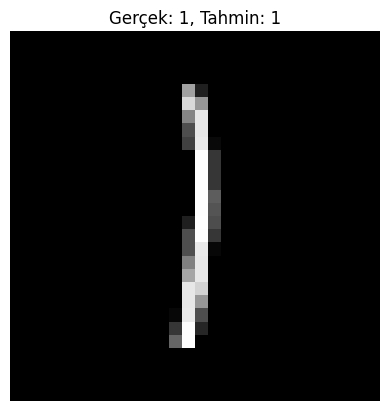

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Veri kümesini yükle
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize ve reshape
x_train = x_train[..., None] / 255.0
x_test = x_test[..., None] / 255.0

# Model oluştur
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

# Tahmin örneği
import numpy as np
i = np.random.randint(0, len(x_test))
img = x_test[i]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Gerçek: {y_test[i]}, Tahmin: {tf.argmax(model.predict(img[None]), axis=1).numpy()[0]}")
plt.axis('off')
plt.show()


In [2]:
import cv2

# Kedi yüzü için hazır cascade yükle
cat_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface.xml')

# Eğer 'kedi.jpg' yoksa, x_test'ten bir örnek kullan
if img is None:
    # x_test örneği [0,1] aralığında ve (28,28,1) float32, bunu uint8 ve 3 kanallı yapalım
    sample = (x_test[i] * 255).astype('uint8')
    if sample.shape[-1] == 1:
        sample = sample.squeeze(-1)
    img = cv2.cvtColor(sample, cv2.COLOR_GRAY2BGR)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Kedi yüzünü algıla
cats = cat_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3)

for (x, y, w, h) in cats:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow('Kedi Tespiti', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step


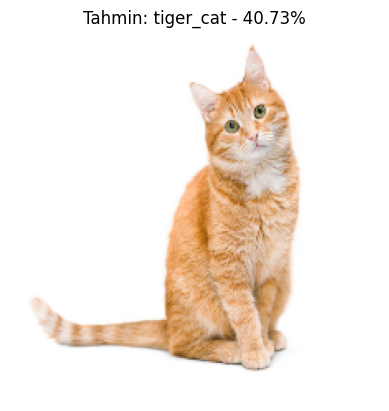

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# DeepLabV3 modeli
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=True)

# Resmi yükle
img = cv2.imread('kedi.jpg')
img_resized = cv2.resize(img, (224, 224))
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
img_input = tf.keras.applications.mobilenet_v2.preprocess_input(img_rgb)
img_input = np.expand_dims(img_input, axis=0)

# Tahmin
preds = model.predict(img_input)
decoded = tf.keras.applications.mobilenet_v2.decode_predictions(preds, top=1)[0][0]

# Göster
plt.imshow(img_rgb)
plt.title(f"Tahmin: {decoded[1]} - {decoded[2]*100:.2f}%")
plt.axis('off')
plt.show() 
